<a href="https://colab.research.google.com/github/kudoshion-wq/Machine-learning/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import io

In [10]:
from google.colab import files
uploaded = files.upload()

Saving test3.csv to test3.csv


In [11]:
!pip install xgboost

In [12]:
file_name = next(iter(uploaded))

In [14]:
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='shift-jis')

In [15]:
print("--- データの先頭 ---")
print(df.head())
print("\n--- データの情報 ---")
df.info()

--- データの先頭 ---
   Rp_exp  H (mm)  B (mm)  L (m)  Mw (ton)  σc (MPa)  σr (MPa)  V (m/s)  \
0    6.85     300     200    3.0       0.3      33.7       379      7.0   
1    3.74     300     200    5.0       0.3      33.7       379      7.0   
2    6.74     300     200    5.0       0.3      33.7       379     10.0   
3    1.34     300     200    5.0       0.3      33.7       379      3.0   
4    0.65     300     200    5.0       0.3      33.7       379      1.0   

     pt (％)  
0  1.090495  
1  1.090495  
2  1.090495  
3  1.090495  
4  1.090495  

--- データの情報 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rp_exp    235 non-null    float64
 1   H (mm)    235 non-null    int64  
 2   B (mm)    235 non-null    int64  
 3   L (m)     235 non-null    float64
 4   Mw (ton)  235 non-null    float64
 5   σc (MPa)  235 non-null    float64
 6   σr (MPa)  235

In [16]:
# 説明変数と目的変数を指定
feature_columns = ['H (mm)', 'B (mm)', 'L (m)', 'Mw (ton)', 'σc (MPa)', 'σr (MPa)', 'V (m/s)', 'pt (％)']
target_column = 'Rp_exp'

X = df[feature_columns]
y = df[target_column]

In [17]:
# データを訓練用とテスト用に分割 (例: 80% 訓練, 20% テスト)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n訓練データ数: {len(X_train)}")
print(f"テストデータ数: {len(X_test)}")


訓練データ数: 188
テストデータ数: 47


In [18]:
# XGBoost 回帰モデルの初期化
# 目的変数を「求める」とのことなので、回帰 (XGBRegressor) を使用します
# もし分類問題の場合は XGBClassifier を使用してください
model = xgb.XGBRegressor(objective='reg:squarederror', # 回帰の目的関数 (二乗誤差)
                         n_estimators=100,           # 決定木の数
                         learning_rate=0.1,          # 学習率
                         max_depth=5,                # 木の深さ
                         random_state=42)

In [19]:
# モデルの訓練
print("\n--- モデルの訓練開始 ---")
model.fit(X_train, y_train)
print("--- モデルの訓練完了 ---")


--- モデルの訓練開始 ---
--- モデルの訓練完了 ---


In [20]:
# テストデータで予測
y_pred = model.predict(X_test)

In [23]:
# モデルの評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse**0.5 # Root Mean Squared Error (平方根平均二乗誤差)

print("\n--- モデルの評価 (テストデータ) ---")
print(f"R^2 (決定係数): {r2:.4f}")
print(f"MSE (平均二乗誤差): {mse:.4f}")
print(f"RMSE (平方根平均二乗誤差): {rmse:.4f}")


--- モデルの評価 (テストデータ) ---
R^2 (決定係数): 0.8780
MSE (平均二乗誤差): 2.3223
RMSE (平方根平均二乗誤差): 1.5239



--- 特徴量の重要度 (グラフ) ---


/tmp/ipython-input-1152593029.py:14: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # レイアウト調整
/tmp/ipython-input-1152593029.py:15: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) missing from font(s) DejaVu Sans.
  plt.savefig('feature_importance_weight.png')


グラフを 'feature_importance_weight.png' として保存しました。


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


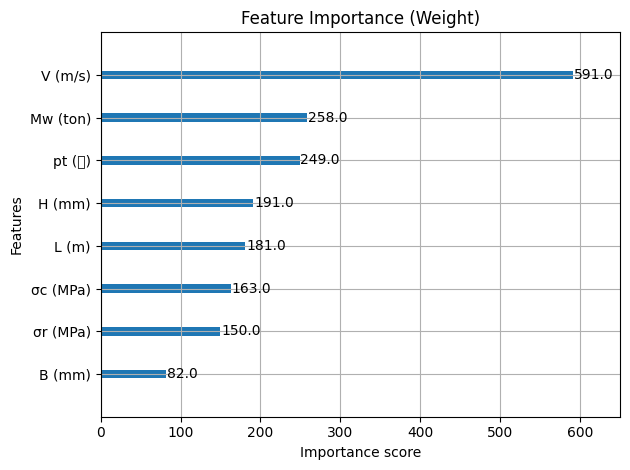

In [30]:
# --- 特徴量の重要度 (グラフ: xgb.plot_importance) ---
print("\n--- 特徴量の重要度 (グラフ) ---")

# xgb.plot_importance は内部で Matplotlib を使うため、事前にサイズ指定は不要
# (ただし、plt.figure() を先に実行しても良い)

# importance_type='weight' を指定してプロット
# max_num_features=10 で上位10件 (今回は8個なので全て表示)
xgb.plot_importance(model,
                    importance_type='weight',
                    max_num_features=10,
                    title='Feature Importance (Weight)')

plt.tight_layout() # レイアウト調整
plt.savefig('feature_importance_weight.png')
print("グラフを 'feature_importance_weight.png' として保存しました。")
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\_'
<>:14: SyntaxWarning: invalid escape sequence '\_'
<>:13: SyntaxWarning: invalid escape sequence '\_'
<>:14: SyntaxWarning: invalid escape sequence '\_'
/tmp/ipython-input-4266126111.py:13: SyntaxWarning: invalid escape sequence '\_'
  plt.xlabel('Actual $R_{p\_exp}$ (実測値)', fontsize=12)
/tmp/ipython-input-4266126111.py:14: SyntaxWarning: invalid escape sequence '\_'
  plt.ylabel('Predicted $R_{p\_exp}$ (予測値)', fontsize=12)



--- 実測値と予測値の比較グラフ ---


実測値 vs 予測値グラフを 'actual_vs_predicted_scatter.png' として保存しました。


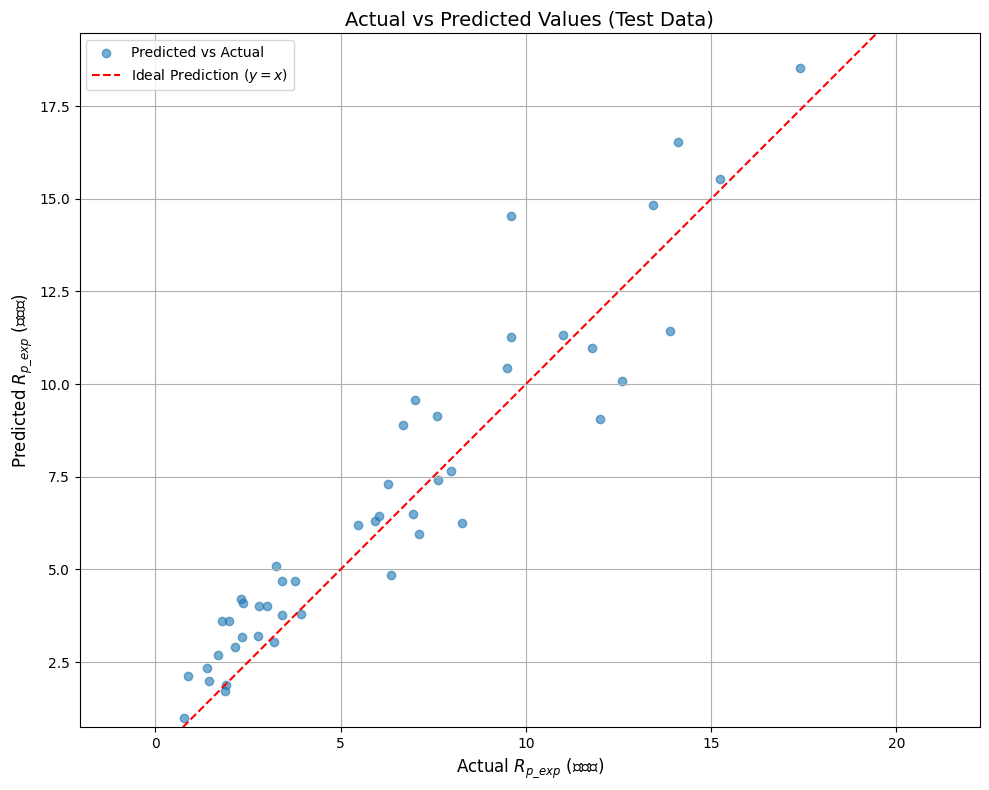

In [29]:
print("\n--- 実測値と予測値の比較グラフ ---")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plot_min = min_val * 0.95
plot_max = max_val * 1.05

plt.plot([plot_min, plot_max], [plot_min, plot_max], 'r--', label='Ideal Prediction ($y=x$)')

plt.xlabel('Actual $R_{p\_exp}$ (実測値)', fontsize=12)
plt.ylabel('Predicted $R_{p\_exp}$ (予測値)', fontsize=12)
plt.title('Actual vs Predicted Values (Test Data)', fontsize=14)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(plot_min, plot_max)
plt.ylim(plot_min, plot_max)
plt.tight_layout()

graph_filename = 'actual_vs_predicted_scatter.png'
plt.savefig(graph_filename)
print(f"実測値 vs 予測値グラフを '{graph_filename}' として保存しました。")
plt.show() # Colab上でグラフを表示